# Face recognition with OpenCV, Python, and deep learning
Source: https://pyimagesearch.com/2018/06/18/face-recognition-with-opencv-python-and-deep-learning/

In this tutorial, I have learnt how to perform facial recognition using OpenCV, Python, and deep learning. I started with a brief discussion of how deep learning-based facial recognition works, including the concept of “deep metric learning.” From there, I installed the libraries needed to perform face recognition. Finally, I implemented face recognition for both still images and video streams (such as webcam and video files). As discovered, the face recognition implementation will be capable of running in real-time.


In [18]:
#46 lines of code
%run Face_Recognition_image.py

[INFO] creating facial embeddings...
1/30, 2/30, 3/30, 4/30, 5/30, 6/30, 7/30, 8/30, 9/30, 10/30, 11/30, 12/30, 13/30, 14/30, 15/30, 16/30, 17/30, 18/30, 19/30, 20/30, 21/30, 22/30, 23/30, 24/30, 25/30, 26/30, 27/30, 28/30, 29/30, 30/30, Done! 
[INFO] recognising faces...
Done! 
Time taken: 16.2 minutes


In [19]:
#60 lines of code
%run Face_Recognition_video.py

[INFO] creating facial embeddings...
Done! 
[INFO] recognising faces in video...
Done! 
Time taken: 23.3 minutes


In [20]:
#60 lines of code
%run Face_Recognition_webcam.py

[INFO] creating facial embeddings...
Done! 
[INFO] recognising faces in webcam...
Done! 
Time taken: 0.1 minutes


If the above does not work, here's the step-by-step instructions:

# Set up folder structure
If you have forked the repository, the folder structure should look like this:

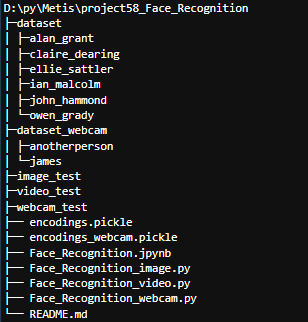

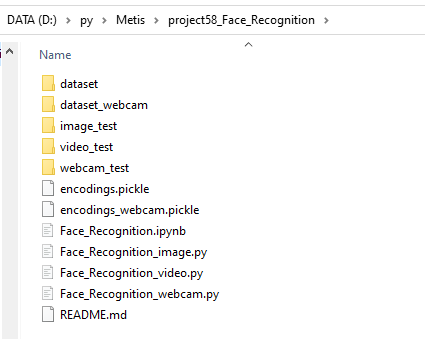


# Install face recognition libraries
In order to perform face recognition with Python and OpenCV, I will need to install these libraries:

The *dlib* library, maintained by Davis King, contains our implementation of “deep metric learning” which is used to construct our face embeddings used for the actual recognition process. Davis has provided a ResNet-based siamese network that is super useful for face recognition tasks. More details: https://pyimagesearch.com/2017/03/13/an-interview-with-davis-king-creator-of-the-dlib-toolkit/

The *face_recognition* library, created by Adam Geitgey, wraps around dlib’s facial recognition functionality, making it easier to work with. Adam’s library provides a wrapper around dlib to make the face recognition functionality easier to use. More details: https://adamgeitgey.com/

The *opencv* library, originally developed by Intel, is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. More details: https://pypi.org/project/opencv-python/

The *imutils* library, maintained by Adrian Rosebrock (pyimagesearch) is a series of convenience functions to make basic image processing functions easier with OpenCV. These processing functions include translation, rotation, resizing, skeletonization, displaying Matplotlib images, sorting contours, detecting edges, and much more. More details: https://github.com/PyImageSearch/imutils

In [1]:
conda install -c conda-forge dlib

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - dlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    dlib-19.24.0               |   py39hf8509d4_0         4.4 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following NEW packages will be INSTALLED:

  dlib               conda-forge/win-64::dlib-19.24.0-py39hf8509d4_0
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.13.0-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1




conda-4.13.0

In [2]:
import dlib
dlib.__version__

'19.24.0'

In [3]:
conda install -c conda-forge face_recognition

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - face_recognition


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    face_recognition-1.3.0     |     pyhd3deb0d_2          17 KB  conda-forge
    face_recognition_models-0.3.0|     pyh9f0ad1d_0        87.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        87.7 MB

The following NEW packages will be INSTALLED:

  face_recognition   conda-forge/noarch::face_recognition-1.3.0-pyhd3deb0d_2
  face_recognition_~ conda-forge/noarch::face_recognition_models-0.3.0-pyh9f0ad1d_0




face_recognition-1.3 | 17 KB     |            |   0% 
face_recognition-1.3 | 17 KB     | #########5 |  95% 
face_recognition-1.

In [4]:
import face_recognition
face_recognition.__version__

'1.2.3'

In [5]:
#Make sure to install OpenCV v2, the package name is **opencv-python**
!pip install opencv-python

In [6]:
import cv2
cv2.__version__

'4.6.0'

In [7]:
#ensure kernel has been set as 'env-cv2'
#Anaconda prompt>>> conda create --name env-cv2 --clone base
#follow instructions here to create kernel: https://stackoverflow.com/questions/69777361/how-to-upgrade-python3-5-to-python3-6-in-virtual-machine
!conda env list

# conda environments:
#
base                  *  C:\Users\Admin\anaconda3
env-cv2                  C:\Users\Admin\anaconda3\envs\env-cv2



In [2]:
!pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25872 sha256=17a7cb23174346c15ff17d2f92a107947d6da7b74d2772060ffa9e2441f50d30
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


# Encode the faces using OpenCV

Before being able to recognise faces in images and videos, I first need to encode (or quantify) the faces in my training set. Keep in mind that I am not actually training a network here - the network (in the library 'face_recognition') has already been trained to create 128-d embeddings from a dataset of ~3 million images.

I could alternatively train a network from scratch or even fine-tune the weights of an existing model, but that is too much to be done for many projects. Furthermore, I would need a lot of images to train the network from scratch. Instead, it is easier to use the pre-trained network and then use it to construct 128-d embeddings for each of the 30 faces in my dataset.

During classification, I have used a simple KNN model and votes to conclude the final face classification. Other traditional machine learning models could be used here as well.

In [1]:
#import the necessary packages
from imutils import paths
import face_recognition
import pickle
import cv2
import os
import time
# import argparse
# #construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument('-i', '--dataset', required=True,
# 	help='path to input directory of faces + images')
# ap.add_argument('-e', '--encodings', required=True,
# 	help='path to serialized db of facial encodings')
# ap.add_argument('-d', '--detection-method', type=str, default='cnn',
# 	help='face detection model to use: either `hog` or `cnn`')
# args = vars(ap.parse_args())
args = {}
args['dataset'] = os.getcwd() + '\\dataset'               #path to input directory of faces and images
args['encodings'] = os.getcwd() + '\\encodings.pickle'    #path to serialized db of facial encodings
args['detection_method'] = 'cnn'                          #face detection model to use: CNN method is more accurate but slower. HOG is faster but less accurate.

os.getcwd()

'D:\\py\\Metis\\project58_Face_Recognition'

# Create facial embeddings

In [2]:
def create_facial_embeddings(args):
    #grab the paths to the input images in our dataset
    print('[INFO] quantifying faces...')
    imagePaths = list(paths.list_images(args['dataset']))
    #initialize the list of known encodings and known names
    knownEncodings = []
    knownNames = []
    for (i, imagePath) in enumerate(imagePaths):
        print(i, imagePath)

    #OpenCV orders color channels in BGR, but the dlib actually expects RGB. The face_recognition module uses dlib, so we need to swap color spaces and name the new image rgb
    ti = time.time()
    print('[INFO] processing image...')
    #loop over the image paths
    for (i, imagePath) in enumerate(imagePaths):
        #extract the person name from the image path
        print('{}/{}'.format(i+1, len(imagePaths)), end=', ')
        name = imagePath.split(os.path.sep)[-2]
        #load the input image and convert it from BGR (OpenCV ordering) to dlib ordering (RGB)
        image = cv2.imread(imagePath)
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #detect the (x,y)-coordinates of the bounding boxes corresponding to each face in the input image
        boxes = face_recognition.face_locations(rgb,  model=args['detection_method'])
        #compute the facial embedding for the face, ie, to turn the bounding boxes of the face into a list of 128 numbers
        encodings = face_recognition.face_encodings(rgb, boxes)
        #loop over the encodings
        for encoding in encodings:
            # add each encoding + name to our set of known names and encodings
            knownEncodings.append(encoding)
            knownNames.append(name)
    print('Done!')
    print('Time taken: {:.1f} minutes'.format((time.time() - ti)/60))

    #dump the names and encodings to disk for future recall
    #encodings.pickle contains the 128-d face embeddings for each face in our dataset
    print('[INFO] serializing encodings...')
    data = {'encodings': knownEncodings, 'names': knownNames}
    f = open(args['encodings'], 'wb')
    f.write(pickle.dumps(data))
    f.close()
    print('Done!')

In [3]:
#using CPU only, encoding 30 images required ~10min !!
args = {}
args['dataset'] = os.getcwd() + '\\dataset'               #path to input directory of faces and images
args['encodings'] = os.getcwd() + '\\encodings.pickle'    #path to serialized db of facial encodings
args['detection_method'] = 'cnn'                          #face detection model to use: CNN method is more accurate but slower. HOG is faster but less accurate.

create_facial_embeddings(args)

[INFO] quantifying faces...
0 D:\py\Metis\project58_Face_Recognition\dataset\alan_grant\Alan Grant (1).jpg
1 D:\py\Metis\project58_Face_Recognition\dataset\alan_grant\Alan Grant (2).jpg
2 D:\py\Metis\project58_Face_Recognition\dataset\alan_grant\Alan Grant (3).jpg
3 D:\py\Metis\project58_Face_Recognition\dataset\alan_grant\Alan Grant (4).jpg
4 D:\py\Metis\project58_Face_Recognition\dataset\alan_grant\Jurassic-World-Dominion-trailer-Sam-Neill-returns-as-Dr-Alan-Grant.jpg
5 D:\py\Metis\project58_Face_Recognition\dataset\claire_dearing\Claire Dearing (1).jpg
6 D:\py\Metis\project58_Face_Recognition\dataset\claire_dearing\Claire Dearing (2).jpg
7 D:\py\Metis\project58_Face_Recognition\dataset\claire_dearing\Claire Dearing (3).jpg
8 D:\py\Metis\project58_Face_Recognition\dataset\claire_dearing\Claire Dearing (4).jpg
9 D:\py\Metis\project58_Face_Recognition\dataset\claire_dearing\Claire Dearing (5).jpg
10 D:\py\Metis\project58_Face_Recognition\dataset\ellie_sattler\Ellie Sattler (1).jpg
11 D

# Recognise faces in images

In [4]:
#import the necessary packages
import face_recognition
import pickle
import cv2
import os
import time
from collections import Counter

args = {}
args['encodings'] = os.getcwd() + '\\encodings.pickle'        #path to serialized db of facial encodings
args['image'] = os.getcwd() + '\\image_test\\test (1).jpg'    #path to input image
args['detection_method'] = 'cnn'                              #face detection model to use: CNN method is more accurate but slower. HOG is faster but less accurate.

In [5]:
def recognise_faces(args):
    ti = time.time()
    #load the known faces and embeddings
    print('[INFO] loading encodings...')
    data = pickle.loads(open(args['encodings'], 'rb').read())
    #load the input image and convert it from BGR to RGB
    image = cv2.imread(args['image'])
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #detect the (x,y)-coordinates of the bounding boxes corresponding to each face in the input image, then compute the facial embeddings for each face
    print('[INFO] recognising faces...')
    boxes = face_recognition.face_locations(rgb, model=args['detection_method'])
    encodings = face_recognition.face_encodings(rgb, boxes)
    #initialize the list of names for each face detected
    names = []

    #loop over the facial embeddings
    for encoding in encodings:
        #attempt to match each face in the input image to our known encodings, function returns a list of True/False values, one for each known encoding
        #Internally, the compare_faces function is computing the Euclidean distance between the candidate embedding and all faces in our known encodings
        votes = face_recognition.compare_faces(data['encodings'], encoding)
        #check to see if a match is found
        if True in votes:
            #find the corresponding names of all faces matched (vote==True)
            matches = [name for name, vote in list(zip(data['names'], votes)) if vote == True]  
            #determine the most frequently occuring name (note: in the unlikely event of a tie, Python will select first entry in the dictionary)
            name = Counter(matches).most_common()[0][0]
        else:
            name = 'Unknown'
        #update the list of names
        names.append(name)

    print([' '.join([e.title() for e in name.split('_')]) for name in names])
    print('Time taken: {:.1f} seconds'.format(time.time() - ti))
          
    #visualise with bounding boxes and labeled names, loop over the recognised faces
    for ((top, right, bottom, left), name) in zip(boxes, names):
        #draw the predicted face name on the image
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        y = top - 15 if top - 15 > 15 else top + 15
        cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    #Display the resulting frame, press 'q' to exit
    window_text = args['image'].split(os.path.sep)[-1]
    cv2.imshow(window_text, image)
    while True:
        #if the `q` key is pressed, break from the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
    #Save output image
    cv2.imwrite(args['image'].rsplit('.', 1)[0] + '_output.jpg', image)

In [6]:
args['image'] = os.getcwd() + '\\image_test\\test (1).jpg'
recognise_faces(args)

[INFO] loading encodings...
[INFO] recognizing faces...
['Alan Grant', 'Ellie Sattler', 'Owen Grady', 'Ian Malcolm', 'Claire Dearing']
Time taken: 124.5 seconds


In [7]:
args['image'] = os.getcwd() + '\\image_test\\test (2).jpg'
recognise_faces(args)

[INFO] loading encodings...
[INFO] recognizing faces...
['Unknown', 'Owen Grady', 'Ellie Sattler', 'Claire Dearing', 'Alan Grant', 'Unknown']
Time taken: 23.7 seconds


In [8]:
args['image'] = os.getcwd() + '\\image_test\\test (3).jpg'
recognise_faces(args)

[INFO] loading encodings...
[INFO] recognizing faces...
['Unknown', 'Claire Dearing', 'Owen Grady', 'Unknown']
Time taken: 25.0 seconds


In [9]:
args['image'] = os.getcwd() + '\\image_test\\test (4).jpg'
recognise_faces(args)

[INFO] loading encodings...
[INFO] recognizing faces...
['Alan Grant']
Time taken: 20.3 seconds


In [10]:
args['image'] = os.getcwd() + '\\image_test\\test (5).jpg'
recognise_faces(args)

[INFO] loading encodings...
[INFO] recognizing faces...
['Ian Malcolm']
Time taken: 154.1 seconds


In [11]:
args['image'] = os.getcwd() + '\\image_test\\test (6).jpg'
recognise_faces(args)

[INFO] loading encodings...
[INFO] recognizing faces...
['Alan Grant', 'Ian Malcolm', 'Ellie Sattler']
Time taken: 41.8 seconds


# Recognise faces in video files

In [13]:
#import the necessary packages
import face_recognition
import imutils
import pickle
import cv2
import os
import time
from collections import Counter

args = {}
args['encodings'] = os.getcwd() + '\\encodings.pickle'              #path to serialized db of facial encodings
args['input'] = os.getcwd() + '\\video_test\\trailer.mp4'           #path to input video
args['output'] = args['input'].rsplit('.', 1)[0] + '_output.avi'    #path to output video
args['display'] = 1                                                 #display output frame to screen: yes or no
args['detection_method'] = 'hog'                                    #face detection model to use: CNN method is more accurate but slower. HOG is faster but less accurate.
#Choose 'hog' if using only CPU (no GPU)

In [14]:
def recognise_faces_video(args):
    ti = time.time()
    #load the known faces and embeddings
    print('[INFO] loading encodings...')
    data = pickle.loads(open(args['encodings'], 'rb').read())
    #initialize pointer to vid file and vid writer
    print('[INFO] processing video...')
    stream = cv2.VideoCapture(args['input'])
    writer = None    #optionally writing processed video frames to disk later, so initialize writer to None

    #loop over frames from the video file stream
    while True:
        #grab next frame
        (grabbed, frame) = stream.read()
        #if frame was not grabbed, then we have reached the end of stream
        if not grabbed:
            break
        #convert the input frame from BGR to RGB then resize it to have a width of 750px (to speedup processing)
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        rgb = imutils.resize(frame, width=750)
        r = frame.shape[1] / float(rgb.shape[1])
        #detect the (x,y)-coordinates of the bounding boxes corresponding to each face in the input frame, then compute the facial embeddings for each face
        boxes = face_recognition.face_locations(rgb, model=args['detection_method'])
        encodings = face_recognition.face_encodings(rgb, boxes)
        names = []

        #loop over the facial embeddings
        for encoding in encodings:
        #attempt to match each face in the input image to our known encodings, function returns a list of True/False values, one for each known encoding
        #Internally, the compare_faces function is computing the Euclidean distance between the candidate embedding and all faces in our known encodings
        votes = face_recognition.compare_faces(data['encodings'], encoding)
        #check to see if a match is found
        if True in votes:
            #find the corresponding names of all faces matched (vote==True)
            matches = [name for name, vote in list(zip(data['names'], votes)) if vote == True]  
            #determine the most frequently occuring name (note: in the unlikely event of a tie, Python will select first entry in the dictionary)
            name = Counter(matches).most_common()[0][0]
        else:
            name = 'Unknown'
        #update the list of names
        names.append(name)

        #visualise with bounding boxes and labeled names, loop over the recognised faces
        for ((top, right, bottom, left), name) in zip(boxes, names):
            #rescale the face coordinates
            top = int(top * r)
            right = int(right * r)
            bottom = int(bottom * r)
            left = int(left * r)
            #draw the predicted face name on the image
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
            y = top - 15 if top - 15 > 15 else top + 15
            cv2.putText(frame, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

        #if the video writer is None *AND* output path is provided (to write the frame to disk)
        if writer is None and args['output'] is not None:
            fourcc = cv2.VideoWriter_fourcc(*'MJPG')    #to use the “MJPG” 4-character code
            writer = cv2.VideoWriter(args['output'], fourcc, 24, (frame.shape[1], frame.shape[0]), True)    #output file path, fourcc, frames per second target, and frame dimensions
        #if the writer is not None, write the frame with recognised faces to disk
        if writer is not None:
            writer.write(frame)

        #check if displaying output frame to screen
        if args['display'] == 1:
            cv2.imshow('Video file', frame)
            #if the `q` key is pressed, break from the loop
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    #do a bit of cleanup
    cv2.destroyAllWindows()
    stream.release()    #close video file pointers
    #check if the video writer point needs to be released
    if writer is not None:
        writer.release()
    print('Time taken: {:.1f} minutes'.format((time.time() - ti)/60))

In [15]:
args['input'] = os.getcwd() + '\\video_test\\trailer.mp4'
args['output'] = args['input'].rsplit('.', 1)[0] + '_output.avi'
recognise_faces_video(args)

[INFO] loading encodings...
[INFO] processing video...
Time taken: 14.0 minutes


In [16]:
args['input'] = os.getcwd() + '\\video_test\\lunch_scene.mp4'
args['output'] = args['input'].rsplit('.', 1)[0] + '_output.avi'
recognise_faces_video(args)

[INFO] loading encodings...
[INFO] processing video...
Time taken: 51.8 minutes


The output videos are: 

trailer_output.avi https://youtu.be/BxfdMrhsEnw

lunch_scene_output.avi https://youtu.be/MtBklF6ivmg

# Recognise faces in webcam

In [1]:
#import the necessary packages
import imutils
from imutils import paths
from imutils.video import VideoStream
import face_recognition
import pickle
import cv2
import os
import time
from collections import Counter

In [3]:
#create facial embeddings
args = {}
args['dataset'] = os.getcwd() + '\\dataset_webcam'               #path to input directory of faces and images
args['encodings'] = os.getcwd() + '\\encodings_webcam.pickle'    #path to serialized db of facial encodings
args['detection_method'] = 'cnn'                                 #face detection model to use: CNN method is more accurate but slower. HOG is faster but less accurate.

create_facial_embeddings(args)

[INFO] quantifying faces...
0 D:\py\Metis\project58_Face_Recognition\dataset_webcam\james\Screenshot_8.jpg
[INFO] processing image...
1/1, Done!
Time taken: 0.3 minutes
[INFO] serializing encodings...
Done!


In [4]:
#turn on webcam
args = {}
args['encodings'] = os.getcwd() + '\\encodings_webcam.pickle'    #path to serialized db of facial encodings
args['output'] = os.getcwd() + '\\webcam_test\\output.avi'       #path to output video
args['display'] = 1                                              #display output frame to screen: yes or no
args['detection_method'] = 'hog'                                 #face detection model to use: CNN method is more accurate but slower. HOG is faster but less accurate.
#Choose 'hog' if using only CPU (no GPU)

In [5]:
ti = time.time()
#load the known faces and embeddings
print('[INFO] loading encodings...')
data = pickle.loads(open(args['encodings'], 'rb').read())
#initialize the video stream and pointer to output video file, then allow the camera sensor to warm up
print('[INFO] starting video stream...')
vs = VideoStream(src=0).start()    #use VideoStream to access webcam, use src=1 for second webcam
time.sleep(2.0)    #time.sleep with 2 seconds to warm up webcam
writer = None    #optionally writing processed video frames to disk later, so initialize writer to None

#loop over frames from the video file stream
while True:
    #grab a frame from the threaded video stream
    frame = vs.read()
    #convert the input frame from BGR to RGB then resize it to have a width of 750px (to speedup processing)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    rgb = imutils.resize(frame, width=750)
    r = frame.shape[1] / float(rgb.shape[1])
    #detect the (x,y)-coordinates of the bounding boxes corresponding to each face in the input frame, then compute the facial embeddings for each face
    boxes = face_recognition.face_locations(rgb, model=args['detection_method'])
    encodings = face_recognition.face_encodings(rgb, boxes)
    names = []
    #loop over the facial embeddings
    for encoding in encodings:
        #attempt to match each face in the input image to our known encodings, function returns a list of True/False values, one for each known encoding
        #Internally, the compare_faces function is computing the Euclidean distance between the candidate embedding and all faces in our known encodings
        votes = face_recognition.compare_faces(data['encodings'], encoding)
        #check to see if a match is found
        if True in votes:
            #find the corresponding names of all faces matched (vote==True)
            matches = [name for name, vote in list(zip(data['names'], votes)) if vote == True]  
            #determine the most frequently occuring name (note: in the unlikely event of a tie, Python will select first entry in the dictionary)
            name = Counter(matches).most_common()[0][0]
        else:
            name = 'Unknown'
        #update the list of names
        names.append(name)

    #visualise with bounding boxes and labeled names, loop over the recognised faces
    for ((top, right, bottom, left), name) in zip(boxes, names):
        #rescale the face coordinates
        top = int(top * r)
        right = int(right * r)
        bottom = int(bottom * r)
        left = int(left * r)
        #draw the predicted face name on the image
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        y = top - 15 if top - 15 > 15 else top + 15
        cv2.putText(frame, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    #if the video writer is None *AND* output path is provided (to write the frame to disk)
    if writer is None and args['output'] is not None:
        fourcc = cv2.VideoWriter_fourcc(*'MJPG')    #to use the “MJPG” 4-character code
        writer = cv2.VideoWriter(args['output'], fourcc, 20, (frame.shape[1], frame.shape[0]), True)    #output file path, fourcc, frames per second target, and frame dimensions
    #if the writer is not None, write the frame with recognised faces to disk
    if writer is not None:
        writer.write(frame)
        
    #check if displaying output frame to screen
    if args['display'] == 1:
        cv2.imshow('Webcam', frame)
        #if the `q` key is pressed, break from the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
#do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()
#check if the video writer point needs to be released
if writer is not None:
    writer.release()
print('Done! \nTime taken: {:.1f} minutes'.format((time.time() - ti)/60))

[INFO] loading encodings...
[INFO] starting video stream...
Done! 
Time taken: 0.2 minutes
